In [10]:
!pip install keras==2.12.0

!pip install scikeras

from pandas import read_csv
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense,Dropout # Use tensorflow.keras.layers
from tensorflow.keras.models import Sequential # Use tensorflow.keras.models
from sklearn.preprocessing import StandardScaler
from seaborn import heatmap
from matplotlib import pyplot as plt
import tensorflow as tf
# from tensorflow import keras  # No need to import keras separately in TensorFlow 2.x
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam # Use tensorflow.keras.optimizers

  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [1]:
!pip uninstall tensorflow keras -y
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)


In [11]:
alpha = read_csv('/content/Alphabets_data.csv')

In [12]:
alpha

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [13]:
alpha.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [14]:
alpha.shape

(20000, 17)

In [15]:
alpha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [16]:
alpha.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [17]:
alpha.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


No null values in the above dataset


In [18]:
alpha1 = alpha.copy()

<Axes: >

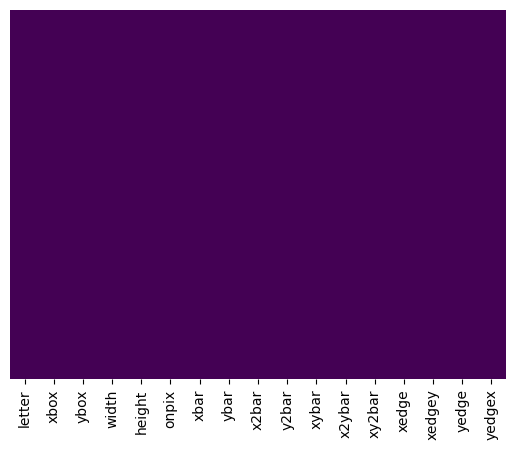

In [19]:
import seaborn as sns
sns.heatmap(alpha1.isnull(),yticklabels=False,xticklabels=True,cbar=False,cmap='viridis')


In [20]:
alpha1.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [21]:
len(alpha1['letter'].unique())

26

In [22]:
alpha1.duplicated().sum()

1332

In [23]:
alpha1.drop_duplicates(inplace=True)

In [24]:
alpha1.duplicated().sum()

0

In [25]:
alpha1.shape

(18668, 17)

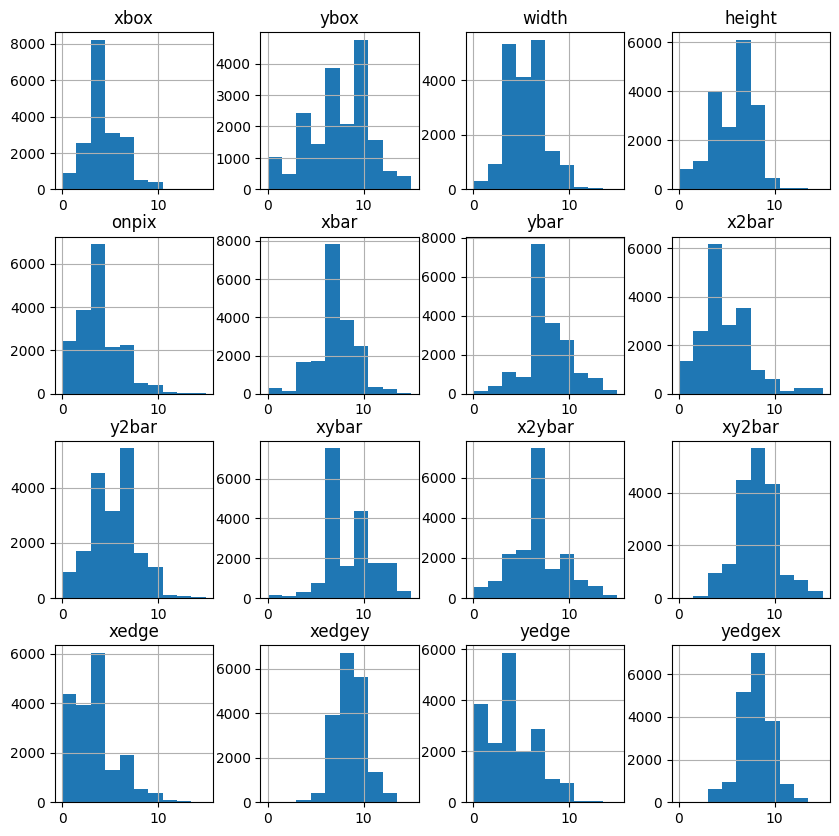

In [26]:
from matplotlib import pyplot as plt
alpha1.hist(figsize=(10,10))
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
let = LabelEncoder()

In [28]:
alpha1['letter'] = let.fit_transform(alpha1['letter'])

In [29]:
alpha1

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [30]:
# Calculate the correlation matrix
corr_matrix = alpha1.corr()
threshold = 0.5

In [31]:
# Select values with correlations above the threshold
best_corr_values = corr_matrix[abs(corr_matrix) > threshold]

In [32]:
# Display the best correlations
print(best_corr_values)

        letter      xbox      ybox     width    height     onpix  xbar  \
letter     1.0       NaN       NaN       NaN       NaN       NaN   NaN   
xbox       NaN  1.000000  0.753845  0.838201  0.656202  0.586514   NaN   
ybox       NaN  0.753845  1.000000  0.660359  0.804746  0.529108   NaN   
width      NaN  0.838201  0.660359  1.000000  0.647059  0.747093   NaN   
height     NaN  0.656202  0.804746  0.647059  1.000000  0.631189   NaN   
onpix      NaN  0.586514  0.529108  0.747093  0.631189  1.000000   NaN   
xbar       NaN       NaN       NaN       NaN       NaN       NaN   1.0   
ybar       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
x2bar      NaN       NaN       NaN       NaN       NaN       NaN   NaN   
y2bar      NaN       NaN       NaN       NaN       NaN       NaN   NaN   
xybar      NaN       NaN       NaN       NaN       NaN       NaN   NaN   
x2ybar     NaN       NaN       NaN       NaN       NaN       NaN   NaN   
xy2bar     NaN       NaN       NaN    

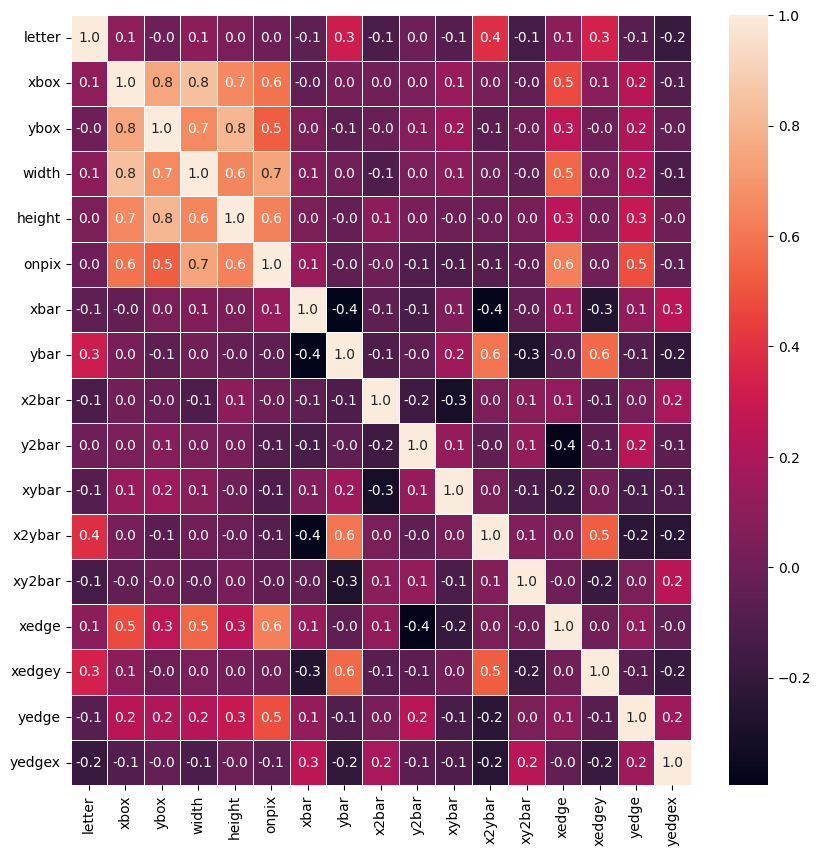

In [33]:
# correlation heatmap

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(alpha1.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

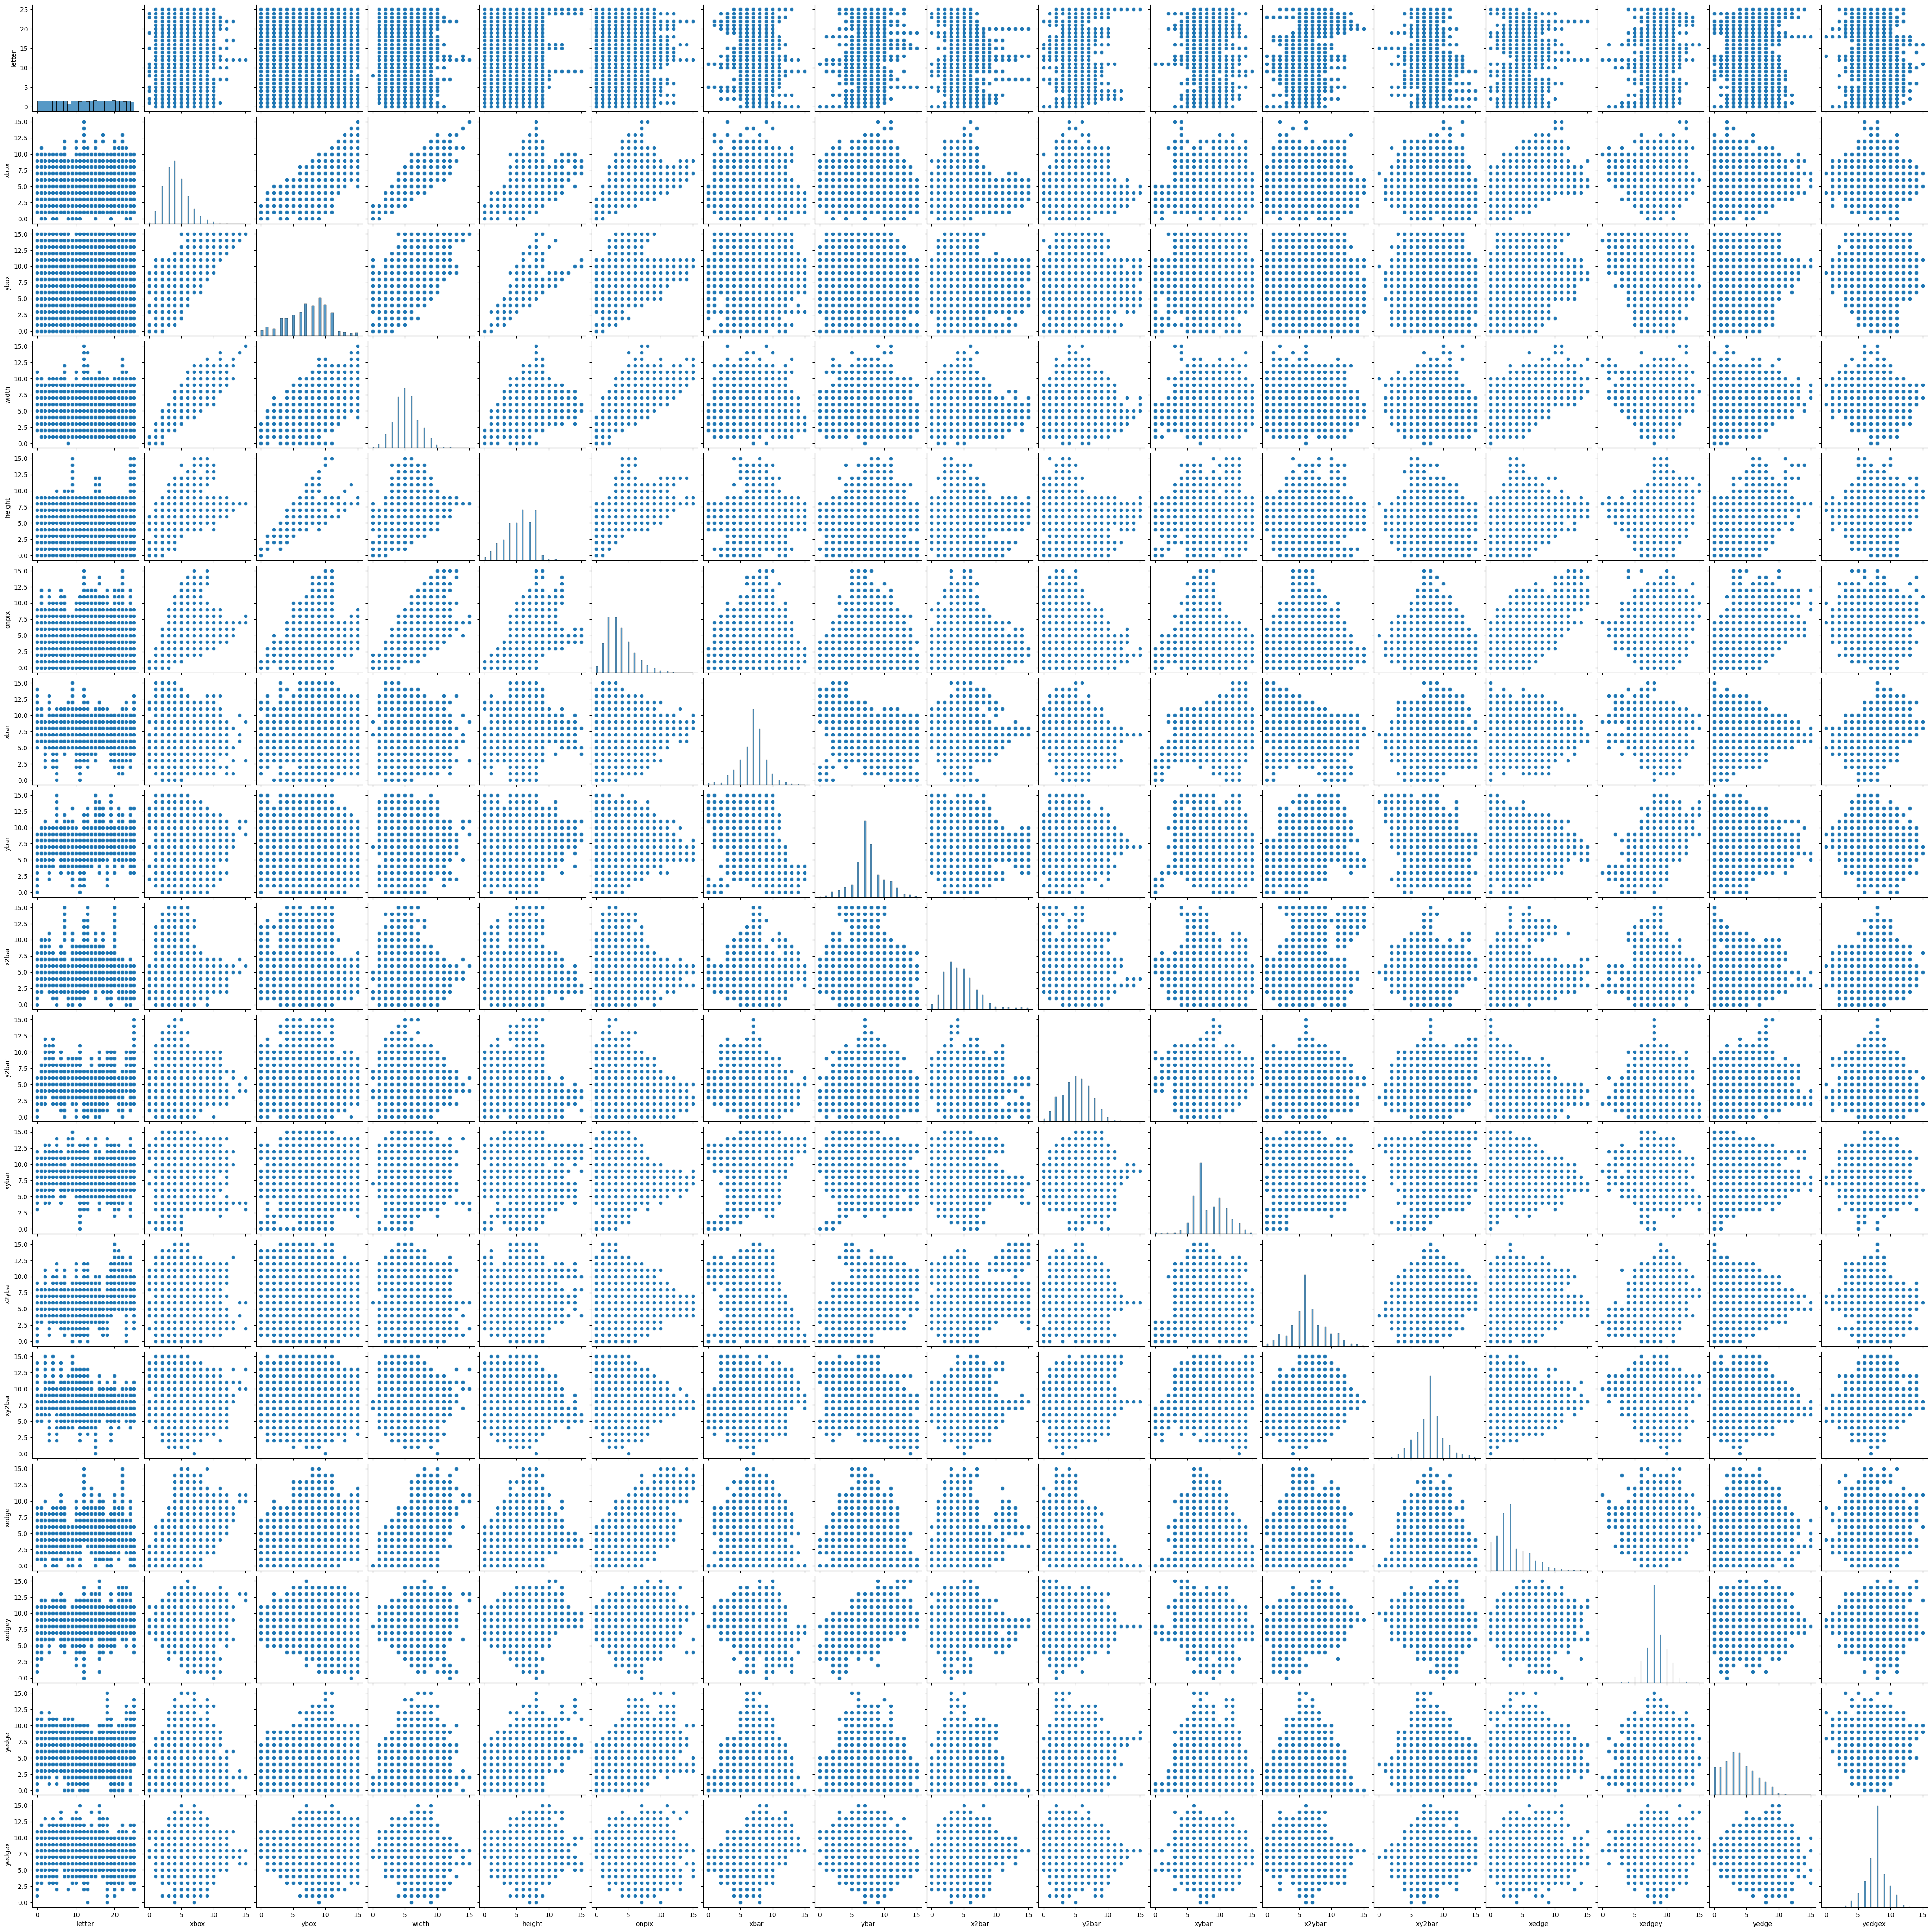

In [34]:
import seaborn as sns
sns.pairplot(alpha1.iloc[:,:17])

In [35]:
X = alpha1.iloc[:,1:-1]
y = alpha1.iloc[:,-1]


In [36]:
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2


In [37]:
y

,yedgex
0,8
1,10
2,9
3,8
4,10
...,...
19994,6
19995,7
19996,7
19997,4


In [38]:
#Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_standardized = sc.fit_transform(X)

In [39]:
import pandas as pd
pd.DataFrame(X_standardized).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712
1,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965
2,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704
3,1.516037,1.178224,0.372167,0.226371,-0.305761,-0.944497,0.633938,-0.222664,0.344235,-1.763246,-0.934503,0.985060,1.234399,1.046582,-0.707373
4,-1.144417,-1.958957,-1.178294,-2.069066,-1.231474,0.531756,-0.659293,0.539054,0.344235,-0.953149,-0.553493,0.510429,-0.917213,-0.858409,0.473635


**Building the model and performing hyperparameters and activation function**

In [40]:
from sklearn.model_selection import GridSearchCV, KFold,train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [42]:
# Build and fit the GridSearchCV

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Assuming 'create_model' is defined elsewhere, modify it to accept input shape
def create_model(neuron1, neuron2, input_shape=None):  # Add input_shape argument
    model = Sequential()
    model.add(Dense(neuron1, activation='relu', input_shape=input_shape))  # Use input_shape here
    model.add(Dropout(0.2))
    model.add(Dense(neuron2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [43]:
# Define the grid search parameters and these are the hidden layers
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

In [44]:
# Wrap the model creation function with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

In [45]:
# Define the grid search parameters, including input_shape
param_grids = dict(
    model__neuron1=neuron1,
    model__neuron2=neuron2,
    model__input_shape=[(X_standardized.shape[1],)]  # Pass input shape as a tuple
)

In [46]:
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10,scoring='accuracy')
grid_result = grid.fit(X_standardized, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 1/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=2;, score=0.000 total time=   4.1s
[CV 2/5; 1/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 1/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=2;, score=0.000 total time=   2.6s
[CV 3/5; 1/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 1/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=2;, score=0.000 total time=   3.1s
[CV 4/5; 1/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 1/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=2;, score=0.000 total time=   2.4s
[CV 5/5; 1/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 1/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=2;, score=0.002 total time=   2.4s
[CV 1/5; 2/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 2/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=4;, score=0.000 total time=   3.9s
[CV 2/5; 2/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 2/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=4;, score=0.000 total time=   5.0s
[CV 3/5; 2/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 2/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=4;, score=0.000 total time=   2.4s
[CV 4/5; 2/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 2/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=4;, score=0.000 total time=   3.5s
[CV 5/5; 2/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 2/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=4;, score=0.002 total time=   4.6s
[CV 1/5; 3/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 3/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=8;, score=0.000 total time=   3.0s
[CV 2/5; 3/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 3/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=8;, score=0.000 total time=   2.4s
[CV 3/5; 3/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 3/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=8;, score=0.000 total time=   3.0s
[CV 4/5; 3/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 3/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=8;, score=0.000 total time=   5.9s
[CV 5/5; 3/9] START model__input_shape=(15,), model__neuron1=4, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 3/9] END model__input_shape=(15,), model__neuron1=4, model__neuron2=8;, score=0.002 total time=   3.1s
[CV 1/5; 4/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 4/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=2;, score=0.000 total time=   2.5s
[CV 2/5; 4/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 4/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=2;, score=0.000 total time=   2.5s
[CV 3/5; 4/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 4/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=2;, score=0.000 total time=   3.2s
[CV 4/5; 4/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 4/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=2;, score=0.000 total time=   3.8s
[CV 5/5; 4/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 4/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=2;, score=0.002 total time=   3.3s
[CV 1/5; 5/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 5/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=4;, score=0.000 total time=   3.0s
[CV 2/5; 5/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 5/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=4;, score=0.000 total time=   3.0s
[CV 3/5; 5/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 5/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=4;, score=0.000 total time=   3.0s
[CV 4/5; 5/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 5/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=4;, score=0.000 total time=   2.5s
[CV 5/5; 5/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 5/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=4;, score=0.002 total time=   3.1s
[CV 1/5; 6/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 6/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=8;, score=0.000 total time=   3.0s
[CV 2/5; 6/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 6/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=8;, score=0.000 total time=   7.4s
[CV 3/5; 6/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 6/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=8;, score=0.000 total time=   5.1s
[CV 4/5; 6/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 6/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=8;, score=0.000 total time=   3.2s
[CV 5/5; 6/9] START model__input_shape=(15,), model__neuron1=8, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 6/9] END model__input_shape=(15,), model__neuron1=8, model__neuron2=8;, score=0.002 total time=   3.7s
[CV 1/5; 7/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 7/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=2;, score=0.000 total time=   2.4s
[CV 2/5; 7/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 7/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=2;, score=0.000 total time=   3.1s
[CV 3/5; 7/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 7/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=2;, score=0.000 total time=   2.3s
[CV 4/5; 7/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 7/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=2;, score=0.000 total time=   3.7s
[CV 5/5; 7/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 7/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=2;, score=0.002 total time=   4.8s
[CV 1/5; 8/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 8/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=4;, score=0.000 total time=   3.6s
[CV 2/5; 8/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 8/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=4;, score=0.000 total time=   3.2s
[CV 3/5; 8/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 8/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=4;, score=0.000 total time=   3.1s
[CV 4/5; 8/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 8/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=4;, score=0.000 total time=   2.5s
[CV 5/5; 8/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 8/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=4;, score=0.002 total time=   2.5s
[CV 1/5; 9/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 9/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=8;, score=0.000 total time=   2.4s
[CV 2/5; 9/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 9/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=8;, score=0.000 total time=   3.1s
[CV 3/5; 9/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 9/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=8;, score=0.000 total time=   2.9s
[CV 4/5; 9/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 9/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=8;, score=0.000 total time=   3.0s
[CV 5/5; 9/9] START model__input_shape=(15,), model__neuron1=16, model__neuron2=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 9/9] END model__input_shape=(15,), model__neuron1=16, model__neuron2=8;, score=0.002 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00032145727297080095, using {'model__input_shape': (15,), 'model__neuron1': 4, 'model__neuron2': 2}
0.00032145727297080095,0.0006429145459416019 with: {'model__input_shape': (15,), 'model__neuron1': 4, 'model__neuron2': 2}
0.00032145727297080095,0.0006429145459416019 with: {'model__input_shape': (15,), 'model__neuron1': 4, 'model__neuron2': 4}
0.00032145727297080095,0.0006429145459416019 with: {'model__input_shape': (15,), 'model__neuron1': 4, 'model__neuron2': 8}
0.00032145727297080095,0.0006429145459416019 with: {'model__input_shape': (15,), 'model__neuron1': 8, 'model__neuron2': 2}
0.00032145727297080095,0.0006429145459416019 with: {'model__input_shape': (15,), 'model__neuron1': 8, 'model__neuron2': 4}
0.00032145727297080095,0.0006429145459416019 with: {'model__input_shape': (15,), 'model__neuron1': 8, 'model__neuron2': 8}
0.00032145727297080095,0.0006429145459416019 with: {'model__input_shape': (15,), 'model__neuron1': 16, 'model__neuron2': 2}
0.00032145727297080095,0.0006

In [48]:
def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 15,kernel_initializer = 'uniform',activation = 'tanh')) # Changed input_dim to 15 to match X_standardized
    model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer = 'uniform',activation = 'tanh')) # Removed input_dim from second Dense Layer as it is automatically inferred
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [49]:

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.00010713520462824084


In [50]:
# Printing the metrics
print(accuracy_score(y,y_predict))

0.00010713520462824084


In [52]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu')) # Change input_dim to 15
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, epochs=150,validation_split=0.33, batch_size=10)
# evaluate the keras model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 8.6485e-04 - loss: -29336.2461 - val_accuracy: 0.0013 - val_loss: -439004.6250
Epoch 2/150
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 8.1842e-04 - loss: -853551.3125 - val_accuracy: 0.0013 - val_loss: -2835686.2500
Epoch 3/150
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 4.9304e-04 - loss: -3895364.5000 - val_accuracy: 0.0013 - val_loss: -8102963.0000
Epoch 4/150
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 5.5236e-04 - loss: -9886139.0000 - val_accuracy: 0.0013 - val_loss: -16647023.0000
Epoch 5/150
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 4.5714e-04 - loss: -19201236.0000 - val_accuracy: 0.0013 - val_loss: -28859388.0000
Epoch 6/150
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 9.9496e-04 - loss: -32251476.0000 - val_accuracy: 0.0013 - val_loss: -45179732.0000
Epoch 7/150
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 5.5280e-04 - loss: -49528228.0000 - va

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

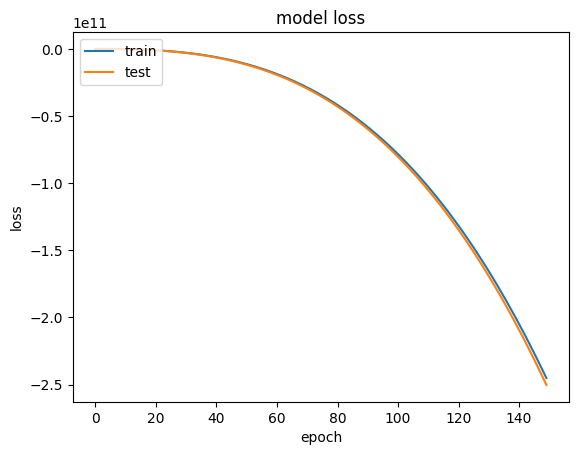

In [54]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Hyperparameters All at Once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
# Pass the parameters to be tuned to param_grids
# Use 'model__' prefix to pass parameters to the create_model function
param_grids = dict(batch_size = batch_size,epochs = epochs,
                   model__learning_rate = learning_rate,
                   model__dropout_rate = dropout_rate,
                   model__activation_function = activation_function,
                   model__init = init,
                   model__neuron1 = neuron1,
                   model__neuron2 = neuron2)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10,scoring='accuracy')
grid_result = grid.fit(X_standardized, y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
#list all data
import matplotlib.pyplot as plt
plt.plot(grid_result.cv_results_['mean_test_score'])